Import and define stuff


In [42]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from scipy import fftpack

def create_cos(N, alpha, beta, gamma):
    x = np.linspace(0, 1, N+1)
    x = x[:-2]
    X, Y = np.meshgrid(x, x)
    return np.cos(2*np.pi*(X*alpha + Y*beta + gamma))


def gkern(l=5, sig=1.):
    """\
    creates gaussian kernel with side length `l` and a sigma of `sig`
    """
    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    gauss = np.exp(-0.5 * np.square(ax) / np.square(sig))
    kernel = np.outer(gauss, gauss)
    return kernel / np.sum(kernel)

Aufgabe 1b)

In [2]:
#Aufgabe 1b)
a = 1/0.2*np.cos(np.pi/6)
b = 1/0.2*np.sin(np.pi/6)
c = 0

cos_b = create_cos(256, a, b, c)
cv2.imshow('bill cos_b', cos_b)
cv2.waitKey()
cv2.destroyAllWindows()

Aufgabe 1c)

In [3]:
#Aufgabe 1c)
a = 8
b = 4 
c = 0.25
cos_c = create_cos(256, a, b, c)
cv2.imshow('cos_c', cos_c)
cv2.waitKey()
cv2.destroyAllWindows()

Aufgabe 1d)

In [7]:
#Aufgabe 1d)
a = 128*np.cos(np.pi)
b = 128*np.sin(np.pi)
a = 128
b = 128
c = 0
cos_d = create_cos(256, a, b, c)
fft_d = np.imag(np.fft.fft2(cos_d))
cv2.imshow('cos_d', cos_d)
cv2.imshow('fft_d', fft_d)
cv2.waitKey()
cv2.destroyAllWindows()

Aufgabe 2a)

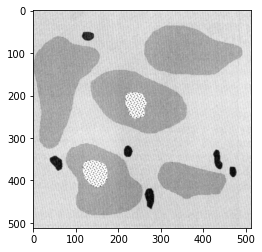

In [37]:
img = cv2.imread('data/how60c.tif', 0)
plt.imshow(np.abs(img), plt.cm.gray)

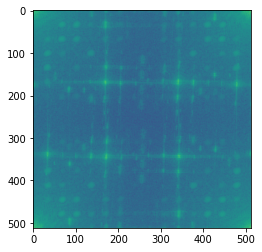

In [19]:

from matplotlib.colors import LogNorm

img_fft = np.fft.fft2(img)
img_fft_shift = np.fft.fftshift(img_fft)

plt.imshow(np.abs(img_fft), norm=LogNorm(vmin=5))

idx_max = np.unravel_index(np.abs(img_fft_shift).argmax(), img_fft.shape)
# cv2.imshow('Original', img)
# cv2.imshow('Fourier', np.abs(img_fft))
# cv2.imshow('Fourier shift', np.abs(img_fft_shift))
# cv2.waitKey()
# cv2.destroyAllWindows()

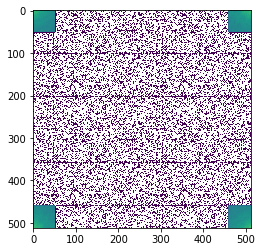

In [50]:

img_fft_filtered = img_fft.copy()
r,c = img_fft.shape
keep_fraction = 0.1
img_fft_filtered[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0 +0j
img_fft_filtered[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0 +0j
plt.imshow(np.abs(img_fft_filtered), norm=LogNorm(vmin=5))


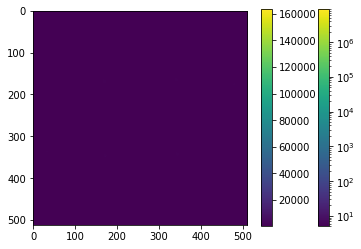

In [63]:
img_fft_gauss = img_fft.copy()
gkernel5 = gkern(5, 1)
gkernel121 = gkern(121, 1)
x = np.real(img_fft_gauss)
img_fft_gauss = cv2.filter2D(x, -1, gkernel5)
img_fft_gauss2 = cv2.filter2D(x, -1, gkernel121)
image_diff = cv2.absdiff(img_fft_gauss, img_fft_gauss2)
# img_fft_gauss = np.convolve(x, gkernel, mode='valid')

plt.imshow(np.abs(img_fft_gauss), norm=LogNorm(vmin=5))
plt.colorbar()
plt.imshow(image_diff)
plt.colorbar()

TypeError: Image data of dtype complex128 cannot be converted to float

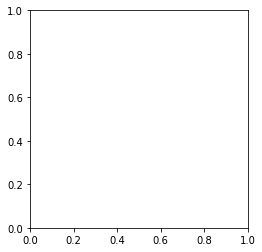

In [52]:
img_filtered = np.fft.ifft2(img_fft_filtered).real
plt.imshow(np.abs(img_fft_filtered), plt.cm.gray)

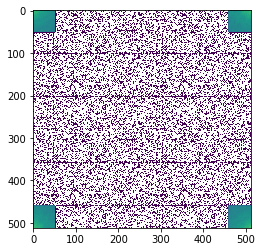

In [48]:
fft_sp = fftpack.fft2(img)
img_fft_filtered = fft_sp.copy()
r,c = fft_sp.shape
keep_fraction = 0.1
img_fft_filtered[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0 +0j
img_fft_filtered[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0 +0j
plt.imshow(np.abs(img_fft_filtered), norm=LogNorm(vmin=5))



Text(0.5, 1.0, 'Reconstructed Image')

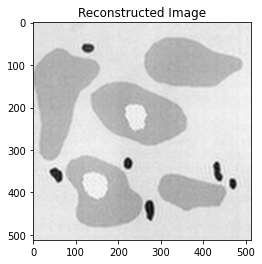

In [41]:
im_new = fftpack.ifft2(img_fft_filtered).real

plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')